In [1]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24.git
%cd DS4B_Sp24/ClassModules/Module5_ModelAssessment/

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 807, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 807 (delta 96), reused 208 (delta 96), pack-reused 598
Receiving objects: 100% (807/807), 147.60 MiB | 15.20 MiB/s, done.
Resolving deltas: 100% (359/359), done.
Updating files: 100% (139/139), done.
/content/DS4B_Sp24/ClassModules/Module5_ModelAssessment


In [2]:
%ls data

mailing.csv  titanic.csv  ToyotaCorolla.csv


In [3]:
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 45.8 MB/s eta 0:00:00


# Regression Trees
Fitting Regression trees to Toyota Corolla data
Shmueli Chapter 9.6
(data introduced in chapter 6)



In [6]:
import numpy as np
import pandas as pd
import dmba
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from dmba import regressionSummary, classificationSummary

toyotaCorolla_df = pd.read_csv('./data/ToyotaCorolla.csv').iloc[:1000,:]
toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

toyotaCorolla_df.info()
toyotaCorolla_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1000 non-null   int64 
 1   Model              1000 non-null   object
 2   Price              1000 non-null   int64 
 3   Age                1000 non-null   int64 
 4   Mfg_Month          1000 non-null   int64 
 5   Mfg_Year           1000 non-null   int64 
 6   KM                 1000 non-null   int64 
 7   Fuel_Type          1000 non-null   object
 8   HP                 1000 non-null   int64 
 9   Met_Color          1000 non-null   int64 
 10  Color              1000 non-null   object
 11  Automatic          1000 non-null   int64 
 12  CC                 1000 non-null   int64 
 13  Doors              1000 non-null   int64 
 14  Cylinders          1000 non-null   int64 
 15  Gears              1000 non-null   int64 
 16  Tax                1000 non-null   int64 
 

,Id,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,502.538000,11860.796000,48.034000,5.486000,2000.290000,62669.429000,102.188000,0.68300,0.048000,1590.180000,...,0.614000,0.983000,0.158000,0.30600,0.288000,0.798000,0.224000,0.157000,0.004000,0.245000
std,289.858781,3748.829864,16.696215,3.299195,1.383407,35414.796253,15.571484,0.46554,0.213873,492.203496,...,0.487074,0.129336,0.364924,0.46106,0.453058,0.401693,0.417131,0.363983,0.063151,0.430302
min,1.000000,4350.000000,1.000000,1.000000,1999.000000,1.000000,69.000000,0.00000,0.000000,1300.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,251.750000,9450.000000,39.000000,3.000000,1999.000000,38924.000000,97.000000,0.00000,0.000000,1400.000000,...,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,502.500000,10900.000000,52.000000,5.000000,2000.000000,58288.500000,110.000000,1.00000,0.000000,1600.000000,...,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,753.250000,12950.000000,62.000000,8.000000,2001.000000,79446.250000,110.000000,1.00000,0.000000,1600.000000,...,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1004.000000,32500.000000,68.000000,12.000000,2004.000000,243000.000000,192.000000,1.00000,1.000000,16000.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC',
              'Doors', 'Tax', 'Weight']
outcome = 'Price'

X = pd.get_dummies(toyotaCorolla_df[predictors], drop_first=True)
y = toyotaCorolla_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

###Grid Search

As we have discussed previously, there are several parameters you can choose in fitting a tree...each of which is a different way of controlling for overfitting.  How should we set these many paramnters??


*Grid Search* is one way to find optimized parameters across many different options.  In tree fitting we have many things we can vary...we can use Grid search as a way to optimize across all of them using cross validation

In [10]:

# user grid search to find optimized tree
param_grid = {
    'max_depth': [1, 5, 10, 15, 20, 25],
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
    'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('First level optimal parameters: ', gridSearch.best_params_)


First level optimal parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [11]:

## now that we are narrowing in on the best options, lets refine some more:

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9 ],
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
    'min_samples_split': [14, 16, 18, 20, 22, 24 ],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

print("summary on training data")
regressionSummary(train_y, regTree.predict(train_X))
print("summary on holdout data")
regressionSummary(valid_y, regTree.predict(valid_X))

Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 16}
summary on training data

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1058.8202
            Mean Absolute Error (MAE) : 767.7203
          Mean Percentage Error (MPE) : -0.8074
Mean Absolute Percentage Error (MAPE) : 6.8325
summary on holdout data

Regression statistics

                      Mean Error (ME) : 60.5241
       Root Mean Squared Error (RMSE) : 1554.9146
            Mean Absolute Error (MAE) : 1026.3487
          Mean Percentage Error (MPE) : -1.3082
Mean Absolute Percentage Error (MAPE) : 9.2311


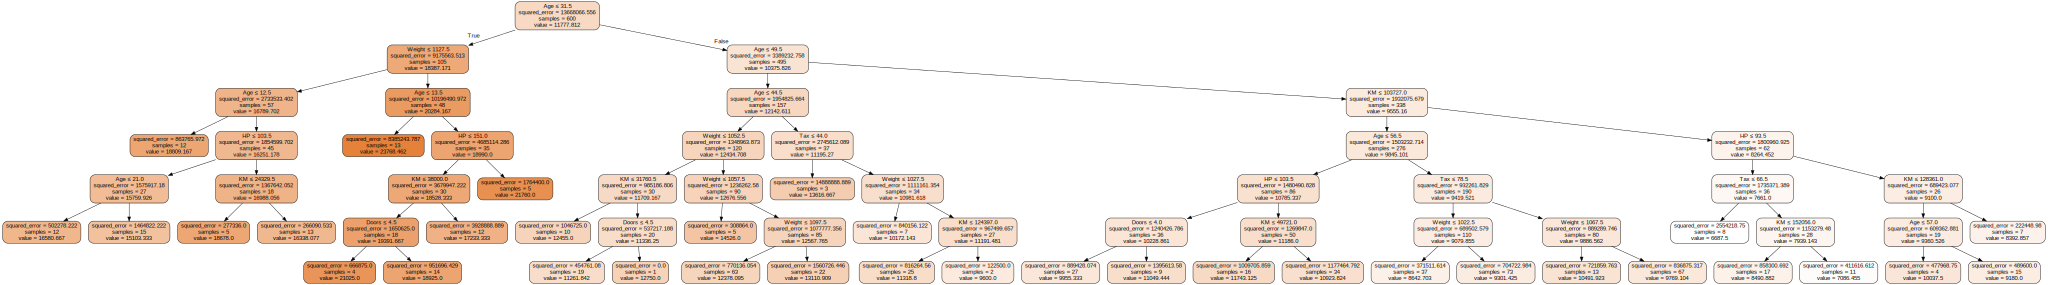

In [15]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
# Export the regression tree to a DOT format
dot_data = export_graphviz(regTree, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to visualize the tree
graph = graphviz.Source(dot_data)
graph.render("regression_tree")  # This will save the tree visualization as a PDF file named 'regression_tree.pdf'
graphviz.Source(dot_data)